<a href="https://colab.research.google.com/github/Sartorio12/Projeto_Modulo_5/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Projeto Final do Módulo VI</center>
<center> Alguns gastos suspeitos identificados

<center><img src='https://i.imgur.com/QLJaHpa.png' style="width:200px">

<center><a href="https://colab.research.google.com/github/Sartorio12/Projeto_Modulo_5/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 5:** <a href="https://github.com/LeGuigs" target="_blank">Guilherme Rezende</a> ; <a href="https://github.com/leticiafelippe" target="_blank">Letícia Felippe</a> ; <a href="https://github.com/sartorio12" target="_blank">Mateus Sartorio</a> ; <a href="https://github.com/hara0-tavares" target="_blank">Harão Tavares</a> ; <a href="https://github.com/jonathaslkc" target="_blank">Jonathas Carvalho</a>



<center><img src='https://i.imgur.com/QadqCNH.jpg' style="width:600px">
<center>Fonte: Agência Câmara de Notícias — Roque de Sá/Agência Senado

---

# **1.** Sobre o estudo e objetivos

O que você imagina quando ouve o conceito **"Cota Parlamentar"** ou **"Cota para o Exercício da Atividade Parlamentar (CEAP)"**?

Você sabia que é através da **CEAP** que deputados e senadores custeiam suas despesas em atividades parlamentares? O mais interessante disso, é que os dados da CEAP que iremos analisar hoje são abertos e podem ser acessados por qualquer pesso, ou seja, qualquer pessoa pode ver como os deputados e senadores utilizam essse tipo de recurso. 

Apesar de cobrir uma quantidade grande de despesas, os gastos com a CEAP devem seguir uma série de regras definidas pelo Ato da Mesa 43/2009. Isso quer dizer que os parlamentares não podem utilizar esses recursos de qualquer maneira. Alguns exemplos de gastos vedados são a aquisição de gêneros alimentícios (ex.: o parlamentar pode gastar com as suas refeições mas não pode comprar carne para o churrasco no fim de semana), gastos de caráter eleitoral e gastos com a participação em cursos de educação básica, graduação e pós-graduação.

Além disso, como citado anteriormente, a CEAP é destinada a custear gastos exclusivamente vinculados ao exercício da atividade parlamentar, o que veda o seu uso para o benefício de terceiros, como por exemplo, o pagamento de refeições para outras pessoas além do próprio parlamentar.
Apesar de todas essas regras, a fiscalização desses gastos é bastante falha, sendo comum o surgimento de denúncias sobre irregularidades.

Neste cenário surgiu um projeto chamado Operação Serenata de Amor ( https://serenata.ai/ ), que tem como objetivo utilizar ferramentas de ciência de dados para fiscalizar gastos públicos e compartilhar informações relevantes com o público. O projeto tem uma série de módulos. Alguns deles são responsáveis por baixar e limpar os dados, outros por identificar irregularidades e por fim existem alguns módulos responsáveis pela divulgação de eventuais alertas de irregularidades. Um desses módulos de divulgação é o bot @RosieDaSerenata, responsável por publicar alertas de irregularidades no Twitter.

<center><img src='https://i.imgur.com/AjyWlf1.jpg'>

**É sobre isso que vamos tratar nesta análise, que tem dois focos principais:**
- *Demonstrar como investigaremos esses dados utilizando Python.*
- *Elaborar conceitos a respeito da utilização da CEAP nos últimos 3 anos, com destaques no cenário de pandemia(COVID-19).*

#### <center> **Nós do grupo 5 esperamos que a leitura desse notebook seja esclarecedora e útil :)**

# **2.** Começando a nossa análise

Essa parte será um pouco teórica, pois nela exibiremos um pouco sobre a limpeza dos dados coletados no site da Câmara. Caso você queira somente acompanhar quais foram as nossas deduções baseadas nessas informações, pode pular para a parte X ( Preciso preencher a parte ).

*Antes de mais nada, vamos apresentar um glossário sobre o DataSet:*

- `Nome Parlamentar(txNomeParlamentar)` :  *Nome adotado pelo Parlamentar ao tomar posse do seu mandato.*
- `ideCadastro(Identificador Único do Parlamentar)` : *Número que identifica unicamente um deputado federal na CD.*
- `nuCarteiraParlamentar(Número da Carteira Parlamentar)` : *Documento usado para identificar um deputado federal na CD.*
- `nuLegislatura(Número da  Legislatura)` : *No contexto da cota CEAP, representa o ano base de início da legislatura.*
- `sgUF(Sigla da Unidade Federal)` : *Representa a UF do parlamentar.*
- `sdPartido(Sigla do Partido)` : *Representa o partido do parlamentar.*
- `codLegislatura(Código da Legislatura)` : *No contexto da cota CEAP, o seu conteúdo representa o código identificador da Legislatura.*
- `numSubCota(Número da Subcota) `: *Representa o código do Tipo de Despesa, comprovada por meio da emissão de um documento fiscal, a qual é debitada na cota do deputado.*
- `txtDescricao(Descrição da Subcota)` : *Descrição do Tipo de Despesa.*
- `numEspecificacaoSubCota(Número da Especificação da Subcota)` : *Representa o código desta especificação mais detalhada.*
- `txtDescricaoEspecificacao(Descrição da Especificação da Subcota)` : *Detalha o tipo de despesa efetuada.*
- `txtFornecedor(Fornecedor)` : *Representa o fornecedor do produto ou serviço presente no documento fiscal.*
- `txtCNPJCPF(CNPJ/CPF)` : *Indica se o fornecedor é CNPJ ou CPF , presente no documento fiscal.*
- `txtNumero(Número do Documento)` : *Indica o número do documento do emissor da NF em questão.*
- `indTipoDocumento(Indicativo de Tipo de Documento Fiscal)` : *Tipo de documento do fiscal – 0 para Nota Fiscal; 1 para Recibo; 2 para Despesa no Exterior.*
- `datEmissao(Data de Emissão)` : *A data de emissão do documento.*
- `vlrDocumento(Valor do Documento)` : *O seu conteúdo é o valor de face do documento fiscal ou o valor do documento que deu causa à despesa.*
- `vlrGlosa(Valor da Glosa)` : *Valor da glosa do documento que deu causa à despesa.*
- `vlrLiquido(Valor Liquido)` : *Valor líquido do documento (será calculado pela diferença entre o Valor do Documento e o Valor da Glosa)*
- `numMes(Mês) `: *Indica o mês da emissão da nota.*
- `numAno(Ano) `: *Indica o ano da emissão da nota.*
- `numParcela(Número da Parcela)` : *O seu conteúdo representa o número da parcela do documento fiscal. Ocorre quando o documento tem de ser reembolsado de forma parcelada.*
- `txtPassageiro(Nome do Passageiro)` : *O nome do passageiro, em caso da emissão do documento ser uma passagem aérea.*
- `txtTrecho(Trecho)` : *Representa qual o trecho da viagem, somente em casos de viagem aérea.*
- `numLote(Número do Lote) `: *Representa a capa do lote em que esse documento será incluído para ser entregue na Câmara para ressarcimento.*
- `numRessarcimento(Número do Ressarcimento) `: *Indica o ressarcimento do qual o documento faz parte.*
- `vlrRestituição(Valor da Restituição)` : *Indica o valor que será restituído sobre aquele documento.*
- `nuDeputadoId(Identificador do Solicitante)` : *Número que identifica um Parlamentar ou Liderança na Transparência da Cota para Exercício da Atividade Parlamentar.*

## **2.1.** Materiais e métodos

O presente trabalho foi desenvolvido utilizando `Google Colaboratory` e `Jupyter Notebook`, com a importação das seguintes bibliotecas:
> * `Pandas`: é uma biblioteca para uso em Python, open-source e de uso gratuito (sob uma licença BSD), que fornece ferramentas para análise e manipulação de dados. ;<br>
> * `Numpy`: é uma biblioteca para a linguagem Python com funções para se trabalhar com computação numérica. Seu principal objeto é o vetor n-dimensional, ou ndarray .;<br>
> * `Matplotlib`: é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB;<br>
> * `Seaborn`: é uma biblioteca que atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada; e<br>
> * `Datetime`: é um módulo que fornece as classes para manipulação de datas e horas. Ainda que a aritmética de data e hora seja suportada, o foco da implementação é na extração eficiente do atributo para formatação da saída e manipulação.

A base de dados pode ser encontrada no site da Câmara ( https://www.camara.leg.br/cota-parlamentar/ ), de acesso livre.

Para versionamento do código utilizamos o `Git` e `GitHub` para publicação do trabalho.

Para organização e acompanhamento das tarefas entre os integrantes do grupo foi utilizado o `Trello`.

As reuniões foram estabelecidas através da plataforma `Discord`.

# **3.** Importando nossas bibliotecas

A parte incial, simples importação de bibliotecas que serão utilizadas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## **3.2.** Importando nossos dados

In [2]:
df1 = pd.read_csv('Ano-2019.csv', sep=';')
df2 = pd.read_csv('Ano-2020.csv', sep=';')
df3 = pd.read_csv('Ano-2021.csv', sep=';')

## **3.3.** Começando com limpeza e verificação de dados

In [3]:
#Concatenando os 3 arquivos em um único
df_unico = pd.concat([df1,df2,df3])

In [4]:
# Verificando o número de partidos que contém o DataFrame
df_unico.sgPartido.value_counts()

PT               71008
PSL              67028
PP               44060
PL               38495
MDB              38487
PSD              36623
PSB              34907
PSDB             34371
REPUBLICANOS     29028
PDT              28706
DEM              27015
PTB              12719
SOLIDARIEDADE    12350
PODE             10574
CIDADANIA         9341
AVANTE            9257
PROS              8599
PSOL              8099
PCdoB             7288
PSC               6991
PATRIOTA          5951
NOVO              5829
PV                3761
PR                1118
REDE               708
PRB                531
S.PART.            377
PPS                225
PATRI              154
PHS                139
PPL                 20
Name: sgPartido, dtype: int64

In [5]:
# Criando uma cópia do dataframe para eventuais imprevistos que possam ocorrer
df_copia = df_unico.copy()

In [6]:
# Verificando o nome das colunas para facilitar na análise
df_copia.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [7]:
# Conferindo o tipo de dado em cada coluna
df_copia.dtypes

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

In [8]:
# Vendo todas as informações e contando os valores não nulos em cada coluna
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          555500 non-null  object 
 1   cpf                        553661 non-null  float64
 2   ideCadastro                553759 non-null  float64
 3   nuCarteiraParlamentar      553759 non-null  float64
 4   nuLegislatura              555500 non-null  int64  
 5   sgUF                       553759 non-null  object 
 6   sgPartido                  553759 non-null  object 
 7   codLegislatura             555500 non-null  int64  
 8   numSubCota                 555500 non-null  int64  
 9   txtDescricao               555500 non-null  object 
 10  numEspecificacaoSubCota    555500 non-null  int64  
 11  txtDescricaoEspecificacao  136177 non-null  object 
 12  txtFornecedor              555467 non-null  object 
 13  txtCNPJCPF                 53

In [9]:
# Procurando numero de dados nulos em percentual
round(df_copia.isnull().mean()*100,2)

txNomeParlamentar             0.00
cpf                           0.33
ideCadastro                   0.31
nuCarteiraParlamentar         0.31
nuLegislatura                 0.00
sgUF                          0.31
sgPartido                     0.31
codLegislatura                0.00
numSubCota                    0.00
txtDescricao                  0.00
numEspecificacaoSubCota       0.00
txtDescricaoEspecificacao    75.49
txtFornecedor                 0.01
txtCNPJCPF                    4.28
txtNumero                     0.00
indTipoDocumento              0.00
datEmissao                    2.82
vlrDocumento                  0.00
vlrGlosa                      0.00
vlrLiquido                    0.00
numMes                        0.00
numAno                        0.00
numParcela                    0.00
txtPassageiro                76.69
txtTrecho                    76.88
numLote                       0.00
numRessarcimento             67.45
vlrRestituicao               99.93
nuDeputadoId        

In [10]:
# o describe foi feito pra destacar os valores negativos presentes nas colunas:'vlrDocumento' e 'vlrLiquido' 
df_copia.describe()

,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,codLegislatura,numSubCota,numEspecificacaoSubCota,indTipoDocumento,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
count,5.536610e+05,553759.000000,553759.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,5.555000e+05,180842.0,364.000000,555500.000000,5.555000e+05
mean,3.208493e+10,166015.342644,289.007700,2018.894387,55.973597,250.656994,0.251131,1.029525,884.412172,3.900387,808.744693,6.083879,2019.669870,0.000238,1.130421e+06,0.0,873.633571,2734.361870,5.045073e+06
std,2.921625e+10,45864.510704,153.129661,0.641326,0.160331,412.069770,0.457949,1.567946,2464.526292,139.446699,2464.253989,3.337029,0.775475,0.015413,7.872364e+05,0.0,2367.571616,773.342999,2.865350e+06
min,1.608657e+06,4930.000000,1.000000,2015.000000,55.000000,1.000000,0.000000,0.000000,-6605.570000,0.000000,-7821.200000,1.000000,2019.000000,0.000000,0.000000e+00,0.0,1.000000,19.000000,0.000000e+00
25%,6.197278e+09,141531.000000,160.000000,2019.000000,56.000000,3.000000,0.000000,0.000000,63.000000,0.000000,49.510000,3.000000,2019.000000,0.000000,0.000000e+00,0.0,6.975000,2265.000000,1.705442e+06
50%,2.227515e+10,178938.000000,292.000000,2019.000000,56.000000,10.000000,0.000000,0.000000,201.380000,0.000000,184.500000,6.000000,2019.000000,0.000000,1.620008e+06,0.0,26.105000,3062.000000,6.888214e+06
75%,5.098035e+10,204449.000000,424.000000,2019.000000,56.000000,122.000000,0.000000,1.000000,747.600000,0.000000,642.000000,9.000000,2020.000000,0.000000,1.707915e+06,0.0,277.395000,3312.000000,7.075930e+06
max,9.989866e+10,217330.000000,627.000000,2019.000000,56.000000,999.000000,4.000000,4.000000,172000.000000,86000.000000,151260.000000,12.000000,2021.000000,1.000000,1.789366e+06,0.0,20000.000000,3487.000000,7.245337e+06


In [11]:
# Essa consulta fizemos um novo df, filtrando na coluna 'txtDescricao' valores diferentes de 'PASSAGEM AÉREA - RPA'  e 'PASSAGEM AÉREA - SIGEPA'
# a partir desse novo df fazer os cálculos de despesas.
valores = df_copia[(df_copia['txtDescricao'] != 'PASSAGEM AÉREA - RPA')&(df_copia['txtDescricao'] != 'PASSAGEM AÉREA - SIGEPA')]
valores['txtDescricao'].unique()
valores.vlrLiquido

0          111.30
1          117.19
2          120.15
3          151.18
4          119.90
           ...   
105600    5000.00
105601    7000.00
105602    4000.00
105603       1.10
105604       1.08
Name: vlrLiquido, Length: 427074, dtype: float64

In [12]:
# os dois valores negativos da coluna 'VrlLiquido'
valores.query('vlrLiquido < 0')['vlrLiquido']

23210    -868.00
28211   -1762.66
Name: vlrLiquido, dtype: float64

In [13]:
# Convertemos a coluna datEmissao de object para datatime e colocamos só pra mostrar o formato dia/mes/ano pq o horário é irrelevante para as consultas
df_copia['datEmissao'] = pd.to_datetime(df_copia['datEmissao'], format = '%Y/%m/%d')
df_copia['datEmissao']

0        2019-01-16
1        2019-02-04
2        2019-02-25
3        2019-03-28
4        2019-05-07
            ...    
105600   2021-07-28
105601   2021-08-11
105602   2021-07-29
105603          NaT
105604          NaT
Name: datEmissao, Length: 555500, dtype: datetime64[ns]

In [14]:
#Conferindo se o type da data foi transformado
df_copia.dtypes

txNomeParlamentar                    object
cpf                                 float64
ideCadastro                         float64
nuCarteiraParlamentar               float64
nuLegislatura                         int64
sgUF                                 object
sgPartido                            object
codLegislatura                        int64
numSubCota                            int64
txtDescricao                         object
numEspecificacaoSubCota               int64
txtDescricaoEspecificacao            object
txtFornecedor                        object
txtCNPJCPF                           object
txtNumero                            object
indTipoDocumento                      int64
datEmissao                   datetime64[ns]
vlrDocumento                        float64
vlrGlosa                            float64
vlrLiquido                          float64
numMes                                int64
numAno                                int64
numParcela                      

In [15]:
# Verificando o novo tamanho do DataFrame
df_copia.shape

(555500, 31)

In [16]:
# Aqui estamos procurando por Parlamentares sem estado e sem partido.
sem_partido_sem_uf = valores[valores['sgUF'].isnull()][['txNomeParlamentar', 'sgUF', 'sgPartido','vlrLiquido']]
sem_partido_sem_uf

,txNomeParlamentar,sgUF,sgPartido,vlrLiquido
0,LID.GOV-CD,NaN,NaN,111.30
1,LID.GOV-CD,NaN,NaN,117.19
2,LID.GOV-CD,NaN,NaN,120.15
3,LID.GOV-CD,NaN,NaN,151.18
4,LID.GOV-CD,NaN,NaN,119.90
...,...,...,...,...
439,LIDMIN,NaN,NaN,4000.00
440,LIDMIN,NaN,NaN,137.97
441,LIDMIN,NaN,NaN,175.18
442,LIDMIN,NaN,NaN,3800.00


In [17]:
#Atribuindo os partidos correspondentes as despesas atribuídas apenas a lideranças
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PSL", 'PSL', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PT", 'PT', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PTB", 'PTB', df_copia.sgPartido) 
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PSDB", 'PSDB', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PODEMOS", 'PODEMOS', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO SOLIDARIEDADE", 'SOLIDARIEDADE', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PSD", 'PSD',df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO NOVO", 'NOVO',df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO DEMOCRATAS", 'DEMOCRATAS', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO CIDADANIA", 'CIDADANIA', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO AVANTE", 'AVANTE', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PDT", 'PDT', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PSOL", 'PSOL', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PROGRESSISTAS", 'PROGRESSISTAS',df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL", 'SOCIAL', df_copia.sgPartido)

In [18]:
# Verificando quantos partidos não possuem registros de UF
sem_partido_sem_uf['txNomeParlamentar'].value_counts()

LIDERANÇA DO PT                                     515
LIDERANÇA DO PTB                                    169
LIDERANÇA DO PSDB                                   168
LIDERANÇA DO PODEMOS                                140
LIDERANÇA DO SOLIDARIEDADE                          137
LIDERANÇA DO PSD                                    104
LIDERANÇA DO NOVO                                    94
LIDERANÇA DO DEMOCRATAS                              75
LIDERANÇA DO CIDADANIA                               68
LIDMIN                                               67
LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL     51
LIDERANÇA DO AVANTE                                  49
LIDERANÇA DO PDT                                     36
LIDERANÇA DO PSL                                     29
LID.GOV-CD                                           15
LIDERANÇA DO PSOL                                    14
LIDERANÇA DO PROGRESSISTAS                           10
Name: txNomeParlamentar, dtype: int64

In [19]:
# Realizando a contagem de frequência por estado dentro do DataFrame
df_unico.sgUF.value_counts()

SP    83873
MG    65193
RJ    50674
RS    48467
BA    43331
PR    41816
PE    28292
SC    19900
CE    19632
MA    14412
PA    14402
PB    12727
GO    11315
RN    10183
ES     9516
TO     9378
MT     9260
MS     7970
RO     7512
PI     7284
AC     6702
AL     6629
SE     6124
AM     5723
RR     5405
AP     5216
DF     2823
Name: sgUF, dtype: int64

In [20]:
#Verificando o funcionamento da atribuição
df_copia[df_copia['txNomeParlamentar'].str.match('LIDERANÇA')].sample(5)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
366,LIDERANÇA DO SOLIDARIEDADE,NaN,NaN,NaN,2019,NaN,SOLIDARIEDADE,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2020,0,NaN,NaN,1687182,NaN,NaN,2864,7038388,http://camara.leg.br/cota-parlamentar/nota-fis...
584,LIDERANÇA DO PT,NaN,NaN,NaN,2019,NaN,PT,56,9,PASSAGEM AÉREA - REEMBOLSO,...,2019,0,MAGDA BEATRIS DA SILVA;,NaN,1620686,NaN,NaN,2439,6890572,https://www.camara.leg.br/cota-parlamentar/doc...
68,LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL,NaN,NaN,NaN,2019,NaN,SOCIAL,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2020,0,NaN,NaN,1714740,NaN,NaN,2865,7089631,http://camara.leg.br/cota-parlamentar/nota-fis...
583,LIDERANÇA DO PT,NaN,NaN,NaN,2019,NaN,PT,56,9,PASSAGEM AÉREA - REEMBOLSO,...,2019,0,MAGDA BEATRIS DA SILVA;,NaN,1620686,NaN,NaN,2439,6890447,https://www.camara.leg.br/cota-parlamentar/doc...
210,LIDERANÇA DO PODEMOS,NaN,NaN,NaN,2019,NaN,PODEMOS,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2019,0,NaN,NaN,1617124,NaN,NaN,3172,6881857,http://camara.leg.br/cota-parlamentar/nota-fis...


In [21]:
#Criando uma cópia para trabalharmos nas questões e realizar as análises devidas
df_2 = df_copia.copy()

# MÓDULO 6 - TOCANTINS

In [22]:
#Mostrar as colunas para explorarmos o df
df_copia.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [23]:
#Novo dataframe com o filtro só para deputados do estado de Tocantins
df_TO = df_copia[df_copia['sgUF'] == 'TO']

In [24]:
#Simples visualização dos primeiros registros
df_TO.head(2)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
22968,FREIRE JÚNIOR,7.402202e+10,74189.0,615.0,2015,TO,MDB,55,3,COMBUSTÍVEIS E LUBRIFICANTES.,...,2019,0,NaN,NaN,1552679,NaN,NaN,496,6733941,http://camara.leg.br/cota-parlamentar/nota-fis...
22969,FREIRE JÚNIOR,7.402202e+10,74189.0,615.0,2015,TO,MDB,55,3,COMBUSTÍVEIS E LUBRIFICANTES.,...,2019,0,NaN,NaN,1557161,NaN,NaN,496,6744495,http://camara.leg.br/cota-parlamentar/nota-fis...


In [25]:
#Instalação do package requests para capturarmos dados por meio da url
#!pip3 install requests

In [26]:
#Importação das libs que trabalharemos e configurar display para visualizar todas as colunas (jupyter)
import requests
import json as js
pd.set_option('display.max_rows', None)

In [27]:
#Rascunhos
"""
request = requests.get("https://minhareceita.org/CNPJ")
request = js.loads(request.content)
df_exemplo = pd.DataFrame([request])
df_exemplo"""

'\nrequest = requests.get("https://minhareceita.org/CNPJ")\nrequest = js.loads(request.content)\ndf_exemplo = pd.DataFrame([request])\ndf_exemplo'

In [28]:
#Seleção dos cnpj/cpf com total de soma e ordenado para somente os 10 primeiros. Transformandos a series em df e aplicamos...
#nome da coluna de retorno do groupby de Valor e resetamos o index
df_gasto = pd.DataFrame({'Valor': df_copia.groupby(['txtCNPJCPF'])['vlrDocumento'].sum().sort_values(ascending = False).head(10)}).reset_index()
df_gasto

,txtCNPJCPF,Valor
0,020.128.620/0016-0,3.517576e+07
1,075.756.510/0015-9,3.050471e+07
2,092.962.950/0016-0,9.269181e+06
3,073.193.230/0019-1,6.333604e+06
4,025.581.570/0016-2,5.459504e+06
5,000.000.000/0000-7,3.579859e+06
6,267.352.270/0017-9,2.900098e+06
7,000.000.000/0000-1,2.618129e+06
8,026.102.350/0012-0,2.263000e+06
9,054.434.490/0014-8,1.862697e+06


In [29]:
#Atribuímos o retorno do get no formado json à nova coluna dados_CNPJ em nosso dataframe do groupby
df_gasto['dados_CNPJ'] = df_gasto['txtCNPJCPF'].map(lambda x: requests.get(f"https://minhareceita.org/{x}"))

In [30]:
#Atribuímos a formatação do json para modelo de dicionário
df_gasto['dados_CNPJ'] = df_gasto['dados_CNPJ'].map(lambda x: js.loads(x.content))

In [31]:
#Simples visualização formatando o dict em list e convertendo-o em dataframe
pd.DataFrame(list(df_gasto['dados_CNPJ']))

,uf,cep,qsa,cnpj,pais,porte,bairro,numero,ddd_fax,municipio,...,codigo_natureza_juridica,data_exclusao_do_simples,motivo_situacao_cadastral,ente_federativo_responsavel,identificador_matriz_filial,qualificacao_do_responsavel,descricao_situacao_cadastral,descricao_tipo_de_logradouro,descricao_motivo_situacao_cadastral,message
0,SP,04634042,"[{'pais': None, 'nome_socio': 'JEROME PAUL JAC...",02012862000160,NaN,DEMAIS,JARDIM BRASIL (ZONA SUL),673,1155826118,SAO PAULO,...,2054.0,None,0.0,,1.0,16.0,ATIVA,RUA,SEM MOTIVO,NaN
1,RJ,20021340,"[{'pais': None, 'nome_socio': 'PAULO SERGIO KA...",07575651000159,NaN,DEMAIS,CENTRO,S/N,1128412702,RIO DE JANEIRO,...,2054.0,None,0.0,,1.0,16.0,ATIVA,PRACA,SEM MOTIVO,NaN
2,SP,06460040,"[{'pais': None, 'nome_socio': 'ANTONIO FLAVIO ...",09296295000160,NaN,DEMAIS,TAMBORE,939,1141349800,BARUERI,...,2054.0,None,0.0,,1.0,16.0,ATIVA,AVENIDA,SEM MOTIVO,NaN
3,DF,70316000,"[{'pais': None, 'nome_socio': 'MARCIA DIAS YOS...",07319323000191,NaN,EMPRESA DE PEQUENO PORTE,ASA SUL,SN,6133224595,BRASILIA,...,2062.0,2010-12-31,0.0,,1.0,49.0,ATIVA,SETOR,SEM MOTIVO,NaN
4,SP,04571936,"[{'pais': None, 'nome_socio': 'BRENO RODRIGO P...",02558157000162,NaN,DEMAIS,CIDADE MONCOES,1376,1138895374,SAO PAULO,...,2046.0,None,0.0,,1.0,16.0,ATIVA,AVENIDA,SEM MOTIVO,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNPJ 00.000.000/0000-07 inválido.
6,DF,70390055,"[{'pais': None, 'nome_socio': 'JULIANA LOMAZZI...",26735227000179,NaN,MICRO EMPRESA,ASA SUL,25,,BRASILIA,...,2305.0,None,0.0,,1.0,65.0,ATIVA,QUADRA,SEM MOTIVO,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNPJ 00.000.000/0000-01 inválido.
8,DF,70340906,"[{'pais': None, 'nome_socio': 'MARCOS ALESSAND...",02610235000120,NaN,MICRO EMPRESA,ASA SUL,38,,BRASILIA,...,2062.0,None,0.0,,1.0,49.0,ATIVA,SETOR,SEM MOTIVO,NaN
9,DF,70070934,"[{'pais': None, 'nome_socio': 'CLEONIDES DE SO...",05443449000148,NaN,DEMAIS,ASA SUL,S/N,0613236025,BRASILIA,...,3999.0,None,0.0,,1.0,16.0,ATIVA,RUA,SEM MOTIVO,NaN


# Laio

# Sartorio

# Gui

# Jonathas

In [32]:
dfto = df_TO.copy()
dfto.reset_index(drop=True, inplace=True)

In [33]:
dfto.cpf = dfto.cpf.astype('int64')

In [34]:
semCnpj = dfto[dfto['txtCNPJCPF'].isna()]
comCnpj = dfto[dfto['txtCNPJCPF'].notna()]
selecao = comCnpj.txtCNPJCPF.str.contains('000.000.000/')
cnpjInvalidos = comCnpj[comCnpj.txtCNPJCPF.str.contains('000.000.000/')]
comCnpj = comCnpj[~selecao]

<BarContainer object of 3 artists>

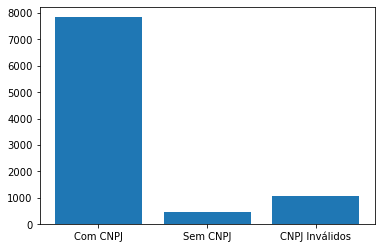

In [63]:
dic = {'Com CNPJ': [comCnpj], 'Sem CNPJ': [semCnpj], 'CNPJ Inválidos': [cnpjInvalidos]}
plt.bar(['Com CNPJ','Sem CNPJ', 'CNPJ Inválidos'], [comCnpj.shape[0], semCnpj.shape[0], cnpjInvalidos.shape[0]])

In [64]:
dfto['txNomeParlamentar'].unique()

array(['FREIRE JÚNIOR', 'JOSI NUNES', 'Vicentinho Júnior',
       'LÁZARO BOTELHO', 'Tiago Dimas', 'CÉSAR HALUM',
       'Professora Dorinha Seabra Rezende', 'Carlos Henrique Gaguim',
       'Dulce Miranda', 'Osires Damaso', 'Eli Borges', 'Célio Moura'],
      dtype=object)

In [110]:
round(dfto['vlrDocumento'].describe(), 2)

count      9378.00
mean        920.31
std        3265.15
min       -2592.63
25%         100.00
50%         224.00
75%         582.62
max      109500.00
Name: vlrDocumento, dtype: float64

In [ ]:
for descricao in df_TO.txtDescricao.unique():
    temp = df_TO[df_TO['txtDescricao'] == descricao]
    plt.boxplot(temp['vlrDocumento'])
    plt.title(descricao)
    plt.show()

In [75]:
dfCelio = dfto[dfto['txNomeParlamentar'] == 'Célio Moura']

In [83]:
round(dfCelio[['vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'vlrRestituicao']].describe(), 2)

,vlrDocumento,vlrGlosa,vlrLiquido,vlrRestituicao
count,1855.00,1855.00,1855.00,0.0
mean,504.08,1.27,438.87,NaN
std,1624.65,14.45,1641.81,NaN
min,-2592.63,0.00,-2592.63,NaN
25%,39.05,0.00,33.59,NaN
50%,139.02,0.00,127.65,NaN
75%,337.98,0.00,262.56,NaN
max,44560.00,550.40,44560.00,NaN


In [89]:
gbCelio = dfCelio.groupby('txtDescricao')['vlrDocumento'].describe()

In [91]:
round(gbCelio.describe(), 2)

,count,mean,std,min,25%,50%,75%,max
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,142.69,1060.64,897.61,-80.89,705.06,885.70,1254.02,5762.61
std,128.61,1727.95,1507.90,779.18,1615.92,1609.16,1931.30,11871.02
min,12.00,12.93,7.15,-2592.63,8.80,10.46,14.38,45.51
25%,55.00,121.44,109.34,4.90,39.39,119.99,138.84,863.75
50%,92.00,268.28,395.45,24.30,127.44,184.96,262.25,2587.50
75%,223.00,1049.98,910.54,60.20,641.14,1001.07,1500.56,3938.74
max,472.00,6346.67,5692.65,600.00,6000.00,6000.00,7000.00,44560.00


In [93]:
selecao = dfCelio['txtDescricao'].isin(['FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR'])

In [112]:
alimentacao = dfCelio[selecao]
alimentacao.shape[0]

237

(array([ 52., 125.,  38.,  12.,   7.,   2.,   0.,   0.,   0.,   1.]),
 array([  8.5 ,  26.15,  43.8 ,  61.45,  79.1 ,  96.75, 114.4 , 132.05,
        149.7 , 167.35, 185.  ]),
 <BarContainer object of 10 artists>)

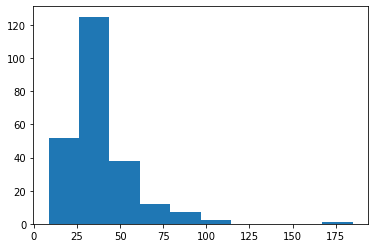

In [100]:
plt.hist(alimentacao['vlrDocumento'])

{'whiskers': [<matplotlib.lines.Line2D at 0xc123797d30>,
 'caps': [<matplotlib.lines.Line2D at 0xc1237a5430>,
 'boxes': [<matplotlib.lines.Line2D at 0xc1237979d0>],
 'medians': [<matplotlib.lines.Line2D at 0xc1237a5af0>],
 'fliers': [<matplotlib.lines.Line2D at 0xc1237a5e50>],
 'means': []}

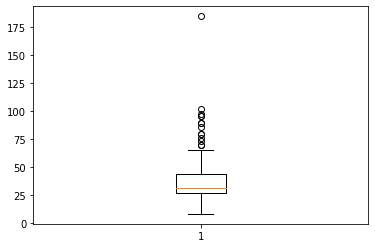

In [102]:
plt.boxplot(alimentacao['vlrDocumento'])

In [104]:
alimentacao[alimentacao['vlrDocumento'] > 100].T

,4036,7304
txNomeParlamentar,Célio Moura,Célio Moura
cpf,12364983134,12364983134
ideCadastro,204370.0,204370.0
nuCarteiraParlamentar,62.0,62.0
nuLegislatura,2019,2019
sgUF,TO,TO
sgPartido,PT,PT
codLegislatura,56,56
numSubCota,13,13
txtDescricao,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR


In [108]:
alimentacao['urlDocumento'].loc[4036]

'http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6892422'

In [109]:
alimentacao['urlDocumento'].loc[7304]

'https://www.camara.leg.br/cota-parlamentar/documentos/publ/3203/2020/7105504.pdf'

In [113]:
alimentacao['dados_CNPJ'] = alimentacao['txtCNPJCPF'].map(lambda x: requests.get(f"https://minhareceita.org/{x}"))

<ipython-input-113-31128b074969>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alimentacao['dados_CNPJ'] = alimentacao['txtCNPJCPF'].map(lambda x: requests.get(f"https://minhareceita.org/{x}"))


In [128]:
alimentacao['dados_CNPJ'].head(2)

4023    {'uf': 'DF', 'cep': '70832515', 'qsa': [{'pais...
4024    {'uf': 'TO', 'cep': '77660000', 'qsa': [{'pais...
Name: dados_CNPJ, dtype: object

In [115]:
alimentacao['dados_CNPJ'] = alimentacao['dados_CNPJ'].map(lambda x: js.loads(x.content))

<ipython-input-115-722af9320587>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alimentacao['dados_CNPJ'] = alimentacao['dados_CNPJ'].map(lambda x: js.loads(x.content))


In [118]:
df_2Celio = pd.DataFrame(list(alimentacao['dados_CNPJ']))

In [127]:
df_2Celio[['razao_social', 'data_situacao_cadastral', 'data_inicio_atividade', 'descricao_motivo_situacao_cadastral', 'descricao_situacao_cadastral']]

,razao_social,data_situacao_cadastral,data_inicio_atividade,descricao_motivo_situacao_cadastral,descricao_situacao_cadastral
0,202 OPEN SHOPPING COMERCIO DE ALIMENTOS LTDA,2000-11-20,2000-11-20,SEM MOTIVO,ATIVA
1,RESTAURANTE RAJA GAUCHA MIRANORTE LTDA,2009-10-15,2009-10-15,SEM MOTIVO,ATIVA
2,BAR E RESTAURANTE TIA ZELIA LTDA,2010-09-06,2010-09-06,SEM MOTIVO,ATIVA
3,BAR E RESTAURANTE TIA ZELIA LTDA,2010-09-06,2010-09-06,SEM MOTIVO,ATIVA
4,BARBOSA COMERCIO DE ALIMENTOS - EIRELI,2015-06-29,2015-06-29,SEM MOTIVO,ATIVA
5,BRASEIRO - RESTAURANTE LTDA,2010-10-04,2010-10-04,SEM MOTIVO,ATIVA
6,CALIFORNIA CAFE E BISTRO LTDA,2013-05-07,2013-05-07,SEM MOTIVO,ATIVA
7,CARNE DE SOL 111 RESTAURANTE EIRELI,2005-11-03,1980-07-07,SEM MOTIVO,ATIVA
8,CHURRASCARIA & CHOPERIA RECANTO GAUCHO EIRELI,2019-04-12,2019-04-12,SEM MOTIVO,ATIVA
9,CARDOSO E COELHO LTDA,2014-01-09,2014-01-09,SEM MOTIVO,ATIVA
